## Compare if we get more information from the first or third column in the mixing matrix estimation if we initialize completly at random


In [1]:
from models.ICA_EM import *
from models.dgp import *
from models.metrics import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib, sys
importlib.reload(sys.modules['models.dgp'])
importlib.reload(sys.modules['models.metrics'])
importlib.reload(sys.modules['models.ICA_EM'])
import tqdm
from sklearn.metrics import mean_squared_error as mse

In [2]:
n = 10000
J = 6
I = 5

def norm_funtion(A, col):
    # [0,0], [1,1] must be one
    if A[0, col] != 0:
        A_0 = A[:, col] / A[0, col]
    else:
        A_0 = A[:, col]
    return A_0

## True A VarEM


In [4]:
true_treatment = []
est_treatment_first = []
est_treatment_third = []
data = dgp(noise_dict= {"loc" : 0, "scale" : 0}, prior= {"loc" : 0, "scale" : 1/np.sqrt(2)})
for i in tqdm.tqdm(range(100)):
    data.generate_data(n,I, J, random_state=i)
    est = VarEM(update_sigma=False, true_A=data.mixing_matrix_observed)
    true_treatment.append(data.treatment_effect)
    est.fit(data.data_observed,J, noise_params= {"mean" : 0, "std" : 1}, progress_bar=False)
    est_treatment_first.append(norm_funtion(est.A, 0)[1])
    est_treatment_third.append(norm_funtion(est.A, 2)[1])

df = pd.DataFrame(
    {
        "true_treatment": true_treatment,
        "est_treatment_first": est_treatment_first,
        "est_treatment_third": est_treatment_third,
    }
)

100%|██████████| 100/100 [1:13:24<00:00, 44.05s/it]


In [15]:


#df.to_csv("results/first_vs_third_VarEM_true_A.csv", index=False)
df = pd.read_csv("results/first_vs_third_VarEM_true_A.csv")

Text(0.5, 0.98, 'First vs Third column VarEM, true A init')

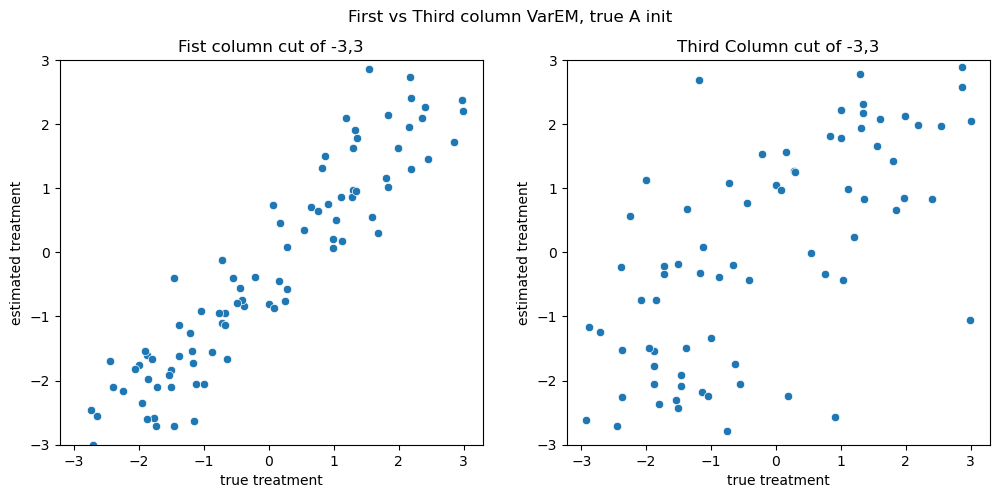

In [14]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = "true_treatment", y = "est_treatment_first", data = df,ax = ax[0])
ax[0].set_title("Fist column cut of -3,3")

ax[0].set_ylabel("estimated treatment")
ax[0].set_xlabel("true treatment")
ax[0].set_ylim(-3,3)

sns.scatterplot(x = "true_treatment", y = "est_treatment_third", data = df,ax = ax[1])
ax[1].set_title("Third Column cut of -3,3")
ax[1].set_ylabel("estimated treatment")
ax[1].set_ylim(-3,3)

ax[1].set_xlabel("true treatment")
fig.suptitle("First vs Third column VarEM, true A init")


In [16]:
# mse
print("MSE first column", np.sqrt(mse(df.true_treatment, df.est_treatment_first)))
print("MSE third column", np.sqrt(mse(df.true_treatment, df.est_treatment_third)))


MSE first column 14.64882020163274
MSE third column 8.510228844900897


### No A Var EM 

In [29]:
true_treatment = []
est_treatment_first = []
est_treatment_third = []
data = dgp(noise_dict= {"loc" : 0, "scale" : 0}, prior= {"loc" : 0, "scale" : 1/np.sqrt(2)})

for i in tqdm.tqdm(range(100)):
    data.generate_data(n,I, J, random_state=i)
    est = VarEM(update_sigma=False)
    true_treatment.append(data.treatment_effect)
    est.fit(data.data_observed,J, noise_params= {"mean" : 0, "std" : 1}, progress_bar=False)
    est_treatment_first.append(norm_funtion(est.A, 0)[1])
    est_treatment_third.append(norm_funtion(est.A, 2)[1])

df = pd.DataFrame(
    {
        "true_treatment": true_treatment,
        "est_treatment_first": est_treatment_first,
        "est_treatment_third": est_treatment_third,
    }
)
#df.to_csv("results/first_vs_third_VarEM_no_A.csv", index=False)
    

100%|██████████| 100/100 [1:13:37<00:00, 44.17s/it]


Text(0.5, 0.98, 'First vs Third column VarEM, no init')

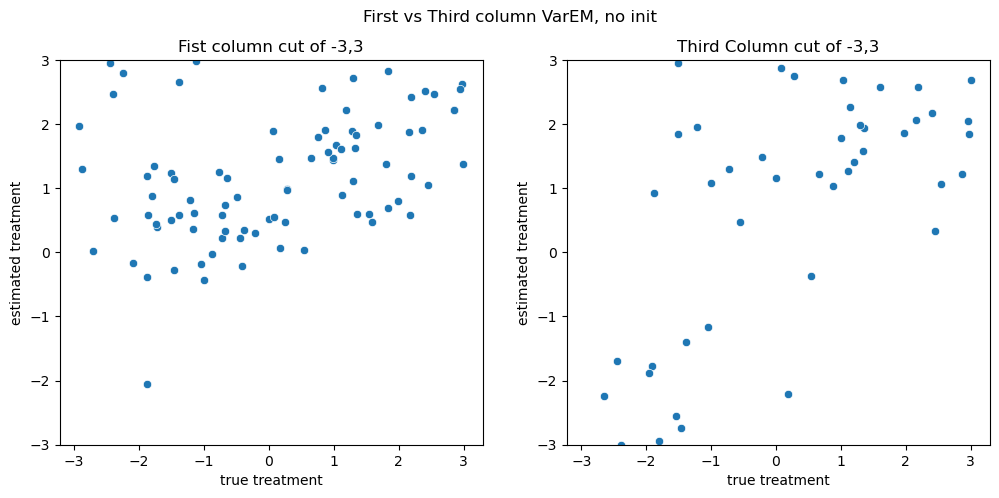

In [7]:

df = pd.read_csv("results/first_vs_third_VarEM_no_A.csv")
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = "true_treatment", y = "est_treatment_first", data = df,ax = ax[0])
ax[0].set_title("Fist column cut of -3,3")

ax[0].set_ylabel("estimated treatment")
ax[0].set_xlabel("true treatment")
ax[0].set_ylim(-3,3)

sns.scatterplot(x = "true_treatment", y = "est_treatment_third", data = df,ax = ax[1])
ax[1].set_title("Third Column cut of -3,3")
ax[1].set_ylabel("estimated treatment")
ax[1].set_ylim(-3,3)

ax[1].set_xlabel("true treatment")
fig.suptitle("First vs Third column VarEM, no init")


In [8]:
# mse
print("MSE first column", np.sqrt(mse(df.true_treatment, df.est_treatment_first)))
print("MSE third column", np.sqrt(mse(df.true_treatment, df.est_treatment_third)))


MSE first column 32.970553385413766
MSE third column 16.013879006657582


### True init CausalVarEM



Text(0.5, 0.98, 'First vs Third column CausalVarEM, no A init')

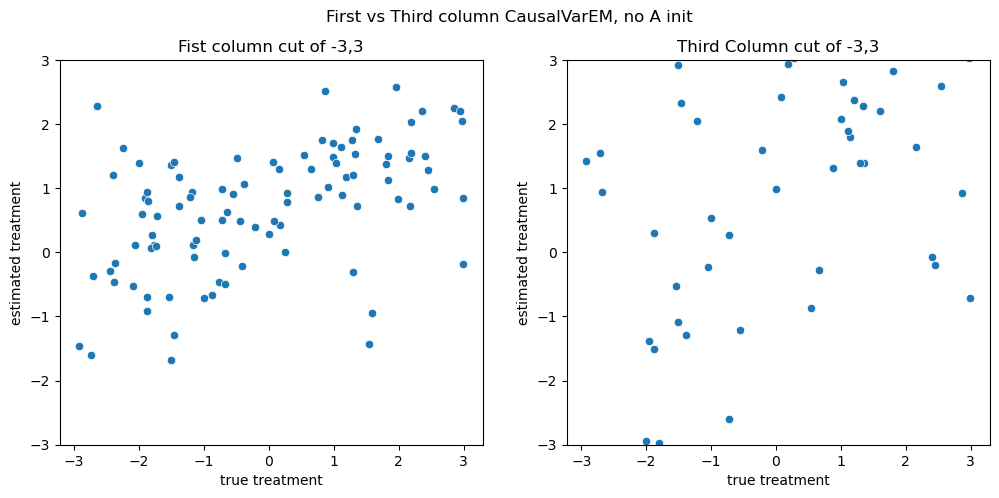

In [9]:
df = pd.read_csv("results/first_vs_third.csv")
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = "true_treatment", y = "est_treatment_first", data = df,ax = ax[0])
ax[0].set_title("Fist column cut of -3,3")

ax[0].set_ylabel("estimated treatment")
ax[0].set_xlabel("true treatment")
ax[0].set_ylim(-3,3)

sns.scatterplot(x = "true_treatment", y = "est_treatment_third", data = df,ax = ax[1])
ax[1].set_title("Third Column cut of -3,3")
ax[1].set_ylabel("estimated treatment")
ax[1].set_ylim(-3,3)

ax[1].set_xlabel("true treatment")
fig.suptitle("First vs Third column CausalVarEM, no A init")


In [10]:
# mse
print("MSE first column", np.sqrt(mse(df.true_treatment, df.est_treatment_first)))
print("MSE third column", np.sqrt(mse(df.true_treatment, df.est_treatment_third)))


MSE first column 1.6511245372750576
MSE third column 36.810521290062375


## True A CausalVarEM




In [4]:
true_treatment = []
est_treatment_first = []
est_treatment_third = []
data = dgp(noise_dict= {"loc" : 0, "scale" : 0}, prior= {"loc" : 0, "scale" : 1/np.sqrt(2)})
for i in tqdm.tqdm(range(100)):
    data.generate_data(n,I, J, random_state=i)
    est = CausalVarEM(update_sigma=False, true_A=data.mixing_matrix_observed)
    true_treatment.append(data.treatment_effect)
    est.fit(data.data_observed,J, noise_params= {"mean" : 0, "std" : 1}, progress_bar=False)
    est_treatment_first.append(norm_funtion(est.A, 0)[1])
    est_treatment_third.append(norm_funtion(est.A, 2)[1])
df = pd.DataFrame(
    {
        "true_treatment": true_treatment,
        "est_treatment_first": est_treatment_first,
        "est_treatment_third": est_treatment_third,
    }
)
#df.to_csv("results/first_vs_third_CausalVarEM_true_A.csv", index=False)
    


100%|██████████| 100/100 [1:14:07<00:00, 44.48s/it]


Text(0.5, 0.98, 'First vs Third column CausalVarEM, true A init')

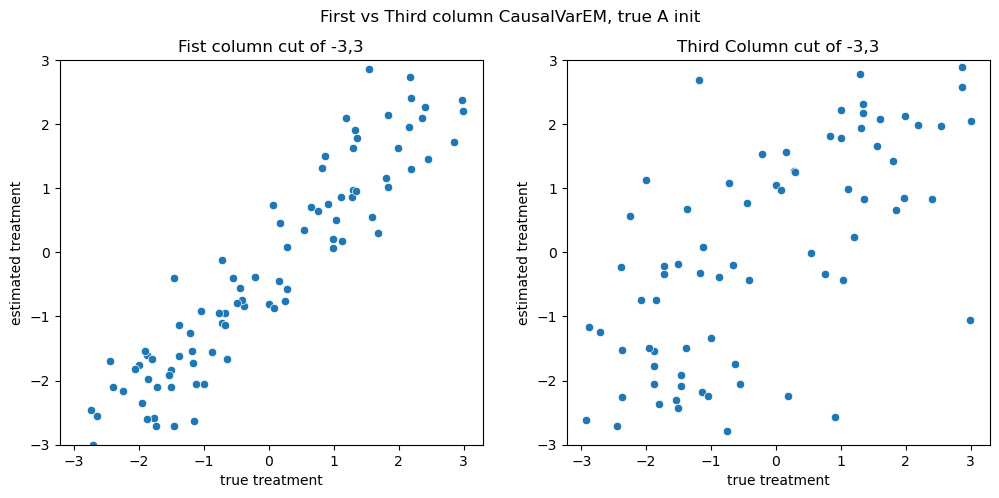

In [11]:
df = pd.read_csv("results/first_vs_third_CausalVarEM_true_A.csv")
fig, ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = "true_treatment", y = "est_treatment_first", data = df,ax = ax[0])
ax[0].set_title("Fist column cut of -3,3")

ax[0].set_ylabel("estimated treatment")
ax[0].set_xlabel("true treatment")
ax[0].set_ylim(-3,3)

sns.scatterplot(x = "true_treatment", y = "est_treatment_third", data = df,ax = ax[1])
ax[1].set_title("Third Column cut of -3,3")
ax[1].set_ylabel("estimated treatment")
ax[1].set_ylim(-3,3)

ax[1].set_xlabel("true treatment")
fig.suptitle("First vs Third column CausalVarEM, true A init")


In [12]:
# mse
print("MSE first column", np.sqrt(mse(df.true_treatment, df.est_treatment_first)))
print("MSE third column", np.sqrt(mse(df.true_treatment, df.est_treatment_third)))


MSE first column 0.763295182278522
MSE third column 3.3396953095972535
